## DCT Image Reconstruction

1. In this notebook we will see how we convert the image into DCT images by using DCT basis.
2. Second part will be reconstructing our original image into spatial domain from DCT basis.

In [24]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 

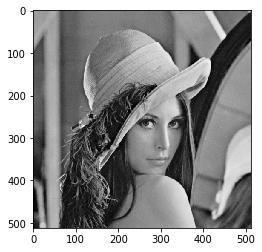

In [25]:
# Read the image
img = cv2.imread(r"D:\Daiict Edu\Thesis Work\lena.png",0)
plt.imshow(img,cmap='gray')

## Generating DCT Kernels With ZigZag ordering

1. You can find more about zig-zag ordering in the JPEG Compression process.

Running DCT
n: 8
Generating DCT basis images


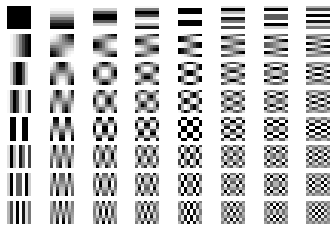

Complete


In [26]:
from math import cos,sqrt,pi
import sys
import pylab as p_
import matplotlib.cm as cm
import numpy as np

def dct(x, y, u, v, n):
    # Normalisation
    def alpha(a):
        if a==0:
            return sqrt(1.0/n)
        else:
            return sqrt(2.0/n)
    return alpha(u) * alpha(v) * cos(((2*x+1)*(u*pi))/(2*n)) * cos(((2*y+1)*(v*pi))/(2*n))

def getBasisImage(u, v, n):
    # for a given (u,v), make a DCT basis image
    basisImg = np.zeros((n,n))
    for y in range(0, n):
        for x in range(0, n):
            basisImg[y,x] = dct(x, y, u, v, n)
    return basisImg

if __name__ == '__main__':
    print("Running DCT")

    # n (int): assume square image, so we don't have different xres and yres
    try:
        n = int(sys.argv[1])
    except:
        n = 8
    print("n: %d" % n)

    # We can get different frequencies by setting u and v
    print("Generating DCT basis images")
    imageSet = []
    for u in range(0, n):
        for v in range(0, n):
            basisImg = getBasisImage(u, v, n)
            imageSet.append(basisImg)

    p_.figure("DCT")
    for i in range(0, len(imageSet)):
        p_.subplot(n, n, i+1)
        p_.axis('off')
        p_.imshow(imageSet[i],cmap = cm.Greys_r)
    p_.show()
    print("Complete" )

## ZigZag Order

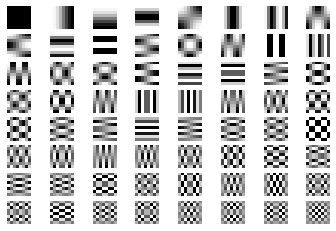

In [27]:
def isOutOfBounds(row,col,height,width):
    return row<0 or row>height or col<0 or col>width


helperList=[[None for i in range(8)] for j in range(8)]
c = 0
for i in range(8):
    for j in range(8):
        helperList[i][j] = imageSet[c]
        c+=1


height =  len(helperList)-1
width = len(helperList[0])-1
result = []
row = 0
col = 0
goingDown = True
while not isOutOfBounds(row,col,height,width):
    #print(A[row][col])
    result.append(helperList[row][col])
    if goingDown:
        if col==0 or row==height:
            goingDown = False
            if row==height:
                col+=1
            else:
                row+=1
        else:
            row+=1
            col-=1
    else:
        if row==0 or col==width:
            goingDown = True
            if col==width:
                row+=1
            else:
                col+=1
        else:
            row-=1
            col+=1



for i in range(len(result)):
    normalizedImg = np.zeros((8,8))
    result[i] =cv2.normalize(result[i],  normalizedImg, 0, 255, cv2.NORM_MINMAX)         
            

p_.figure("DCT")
for i in range(0, len(result)):
    p_.subplot(n, n, i+1)
    p_.axis('off')
    p_.imshow(result[i],cmap = cm.Greys_r)
p_.show()

## Creating Images in the DCT Domain

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
# Doing for all kernels with stride = 2
dct_kernels = np.array(result)
gray_img_copy = np.expand_dims(np.expand_dims(np.array(img),2),0)
def kernel_init(shape,dtype=None):
    kernel = np.zeros(shape)
    kernel[:,:,0,0] = dct_kernels[count]
    return kernel
count = 0 
imageArray = [] # convoluted image array
imageArraySum= []
for i in range(64):
    model = Sequential()
    model.add(Conv2D(1, [8,8], kernel_initializer=kernel_init,strides=(1,1),input_shape=(512,512,1), padding="same"))
    model.build()
    count+=1
    out = model.predict(gray_img_copy)
    out = out[0,:,:,0]
    imageArray.append(out)
    imageArraySum.append(np.sum(out))

## Let us visualize few Images

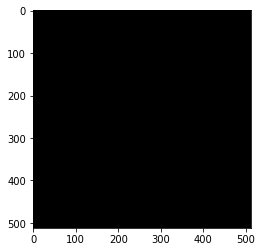

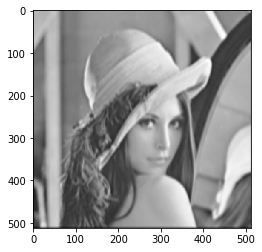

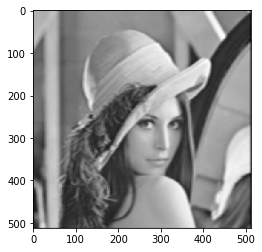

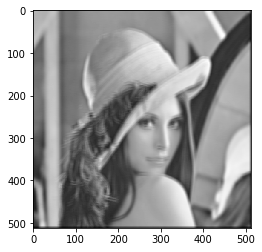

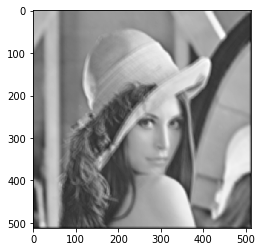

In [29]:
count = 0
for i in range(len(imageArray)):
    plt.figure()
    plt.imshow(imageArray[i],cmap="gray")
    count+=1
    if count==5:
        break

##  Reconstruction of original Image

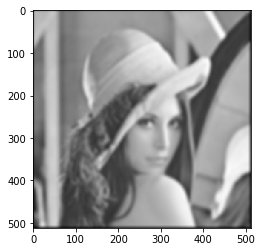

In [30]:
def kernel_init(shape,dtype=None):
    kernel = np.zeros(shape)
    kernel[:,:,0,0] = dct_kernels[count]
    return kernel
reconstructed=[]
count=0
for i in range(len(imageArray)):
    model = Sequential()
    model.add(Conv2D(1, [8,8], kernel_initializer=kernel_init,strides=(1,1),input_shape=(512,512,1), padding="same"))
    model.build()
    count+=1
    temp = np.expand_dims(np.expand_dims(np.array(imageArray[i]),2),0)
    out = model.predict(temp)
    out = out[0,:,:,0]
    reconstructed.append(out)


finalImg = np.zeros((512,512))
for i in range(len(reconstructed)):
    finalImg = np.add(finalImg,reconstructed[i])
plt.imshow(finalImg,cmap='gray')

## Difference Between Original and Normalized Image

In [32]:
abs(np.sum(img) - np.sum(finalImg))

1.4377042693763731e+17